In [7]:
import numpy as np
import matplotlib.pyplot as plt

lungime_x = lungime_y = 1.0
alfa = 30  

In [8]:
def u_exacta(x, y):
    return np.exp(-alfa * ((x - 0.5)**2 + (y - 0.5)**2))

In [9]:
def sursa_f(x, y):
    u = u_exacta(x, y)
    du_dx = -2 * alfa * (x - 0.5) * u
    du_dy = -2 * alfa * (y - 0.5) * u
    d2u_dx2 = (4 * alfa**2 * (x - 0.5)**2 - 2 * alfa) * u
    d2u_dy2 = (4 * alfa**2 * (y - 0.5)**2 - 2 * alfa) * u

    coef_x = 1 + x**2
    coef_y = 1 + y**2
    dcoef_x = 2 * x
    dcoef_y = 2 * y

    termen_x = dcoef_x * du_dx + coef_x * d2u_dx2
    termen_y = dcoef_y * du_dy + coef_y * d2u_dy2
    return -(termen_x + termen_y)

In [10]:
def derivata_exacta_x(x, y):
    u = u_exacta(x, y)
    return -2 * alfa * (x - 0.5) * u

In [15]:
def rulare(n):
    x = np.linspace(0, lungime_x, n)
    y = np.linspace(0, lungime_y, n)
    h = x[1] - x[0]
    X, Y = np.meshgrid(x, y, indexing='ij')

    coef_x = 1 + X**2
    coef_y = 1 + Y**2
    f = sursa_f(X, Y)
    u_ex = u_exacta(X, Y)

    u = np.zeros_like(X)

    deriv_stanga = derivata_exacta_x(0, y)
    deriv_dreapta = derivata_exacta_x(1, y)
    # Folosind noduri fictive și diferențe centrate
    u_fictiv_stanga = u[1,:] - 2*h*deriv_stanga
    u_fictiv_dreapta = u[-2,:] + 2*h*deriv_dreapta
    
    u[0,1:-1] = (u_fictiv_stanga[1:-1] + u[1,1:-1])/2  # x=0
    u[-1,1:-1] = (u_fictiv_dreapta[1:-1] + u[-2,1:-1])/2  # x=1

    u[:, 0] = u_ex[:, 0]
    u[:, -1] = u_ex[:, -1]

    u_nou = u.copy()

    for _ in range(2000):
        u_vechi = u_nou.copy()
        for i in range(1, n-1):
            for j in range(1, n-1):
                kx1 = coef_x[i-1, j]
                kx2 = coef_x[i+1, j]
                ky1 = coef_y[i, j-1]
                ky2 = coef_y[i, j+1]

                kxp = 0.5 * (coef_x[i, j] + coef_x[i+1, j])
                kxm = 0.5 * (coef_x[i, j] + coef_x[i-1, j])
                kyp = 0.5 * (coef_y[i, j] + coef_y[i, j+1])
                kym = 0.5 * (coef_y[i, j] + coef_y[i, j-1])

                u_nou[i, j] = (
                    kxp * u_vechi[i+1, j] + kxm * u_vechi[i-1, j] +
                    kyp * u_vechi[i, j+1] + kym * u_vechi[i, j-1] +
                    h**2 * f[i, j]
                ) / (kxp + kxm + kyp + kym)

    u_fictiv_stanga = u[1,:] - 2*h*deriv_stanga
    u_fictiv_dreapta = u[-2,:] + 2*h*deriv_dreapta
    u_nou[0,1:-1] = (u_fictiv_stanga[1:-1] + u_nou[1,1:-1])/2
    u_nou[-1,1:-1] = (u_fictiv_dreapta[1:-1] + u_nou[-2,1:-1])/2

    u_nou[:, 0] = u_ex[:, 0]
    u_nou[:, -1] = u_ex[:, -1]

    eroare = np.linalg.norm(u_nou - u_ex) * h * h
    return u_nou, u_ex, np.abs(u_nou - u_ex), eroare, h, X, Y


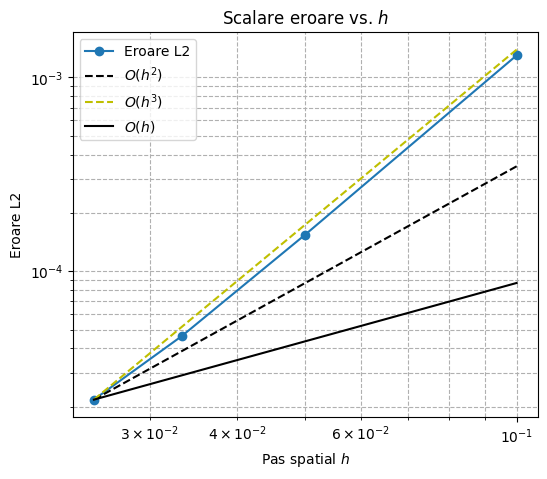

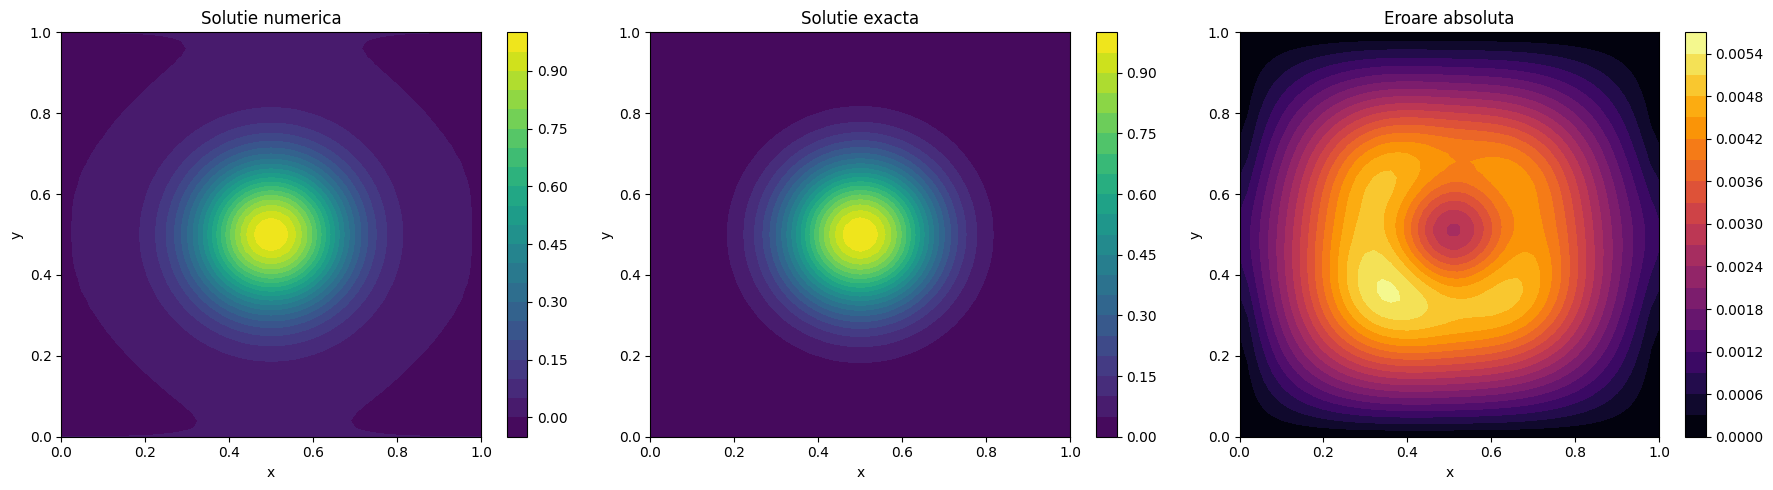

In [16]:
rezolutii = [11, 21, 31, 41]
erori = []
pasi = []
for n in rezolutii:
    _, _, _, err, h, _, _ = rulare(n)
    erori.append(err)
    pasi.append(h)

plt.figure(figsize=(6, 5))
plt.loglog(pasi, erori, 'o-', label='Eroare L2')
plt.loglog(pasi, [erori[-1]*(h/pasi[-1])**2 for h in pasi], 'k--', label='$O(h^2)$')
plt.loglog(pasi, [erori[-1]*(h/pasi[-1])**3 for h in pasi], 'y--', label='$O(h^3)$')
plt.loglog(pasi, [erori[-1]*(h/pasi[-1]) for h in pasi], 'k-', label='$O(h)$')
plt.xlabel('Pas spatial $h$')
plt.ylabel('Eroare L2')
plt.title('Scalare eroare vs. $h$')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.show()

u_num, u_ex, err, _, _, X, Y = rulare(51)

fig, axe = plt.subplots(1, 3, figsize=(18, 5))
cs1 = axe[0].contourf(X, Y, u_num, 20, cmap='viridis')
axe[0].set_title('Solutie numerica')
fig.colorbar(cs1, ax=axe[0])

cs2 = axe[1].contourf(X, Y, u_ex, 20, cmap='viridis')
axe[1].set_title('Solutie exacta')
fig.colorbar(cs2, ax=axe[1])

cs3 = axe[2].contourf(X, Y, err, 20, cmap='inferno')
axe[2].set_title('Eroare absoluta')
fig.colorbar(cs3, ax=axe[2])

for ax in axe:
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()
